In [65]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression


In [45]:
data = pd.read_csv(r"C:\train.csv")

# some analysis


In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


= Suvived is numirical so we will change the type to catrgory

In [51]:
d = data.isnull().sum()
df =  round(d*100/len(data))
df

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [52]:
data.drop("PassengerId", axis=1, inplace= True)

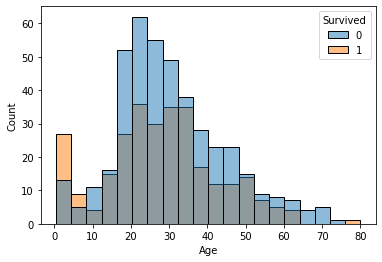

In [53]:
sns.histplot(x="Age", data= data, hue="Survived")
plt.show()

= we can see that the number of children survived is more than older people

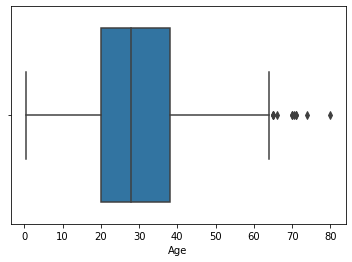

In [54]:
sns.boxplot(x="Age", data=data)
plt.show()

= we have outliers (more than 70 y/o)

In [56]:
data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

= The people alone on the ship much more than people with siblings

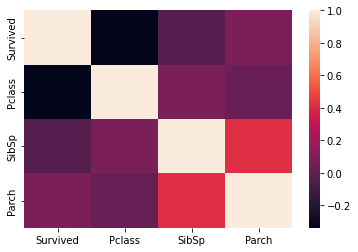

In [57]:
cor = data[["Survived","Pclass","SibSp","Parch"]].corr()
sns.heatmap(cor)
plt.show()

= we can see little corelation between sib, pa as they are familly members

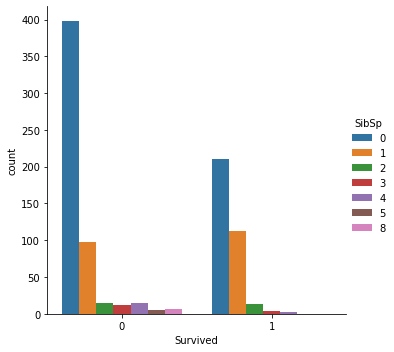

In [61]:
sns.catplot(x="Survived", kind= "count", hue="SibSp", data=data)
plt.show()

= the more the people have siblings the less chance they have to survive

In [63]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
data["Survived"] = data["Survived"].astype('category')

= The most of people on the ship was from Southampton

# Logistic regression

In [115]:
data.dropna(inplace=True)

In [117]:
x_train = data[["Age","SibSp"]]
y_train = data['Survived']
x_train.shape

(183, 2)

In [119]:
y_train.shape

(183,)

In [120]:
clas = LogisticRegression().fit(x_train, y_train)

In [121]:
y_pred = clas.predict(x_train)
print("Prediction on training set:", y_pred)

Prediction on training set: [1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [122]:
print("Accuracy on training set:", clas.score(x_train, y_train))

Accuracy on training set: 0.7158469945355191


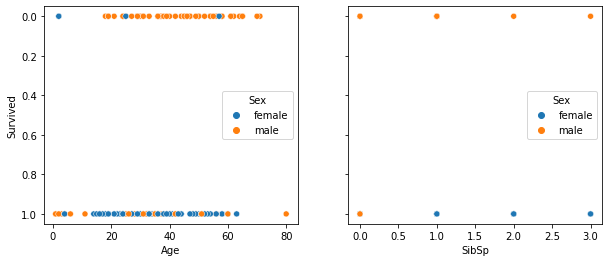

In [142]:
fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
sns.scatterplot(x=x_train.iloc[:,0], y=y_train,data=data, hue="Sex", ax= ax[0])
sns.scatterplot(x=x_train.iloc[:,1], y=y_train,data=data, hue="Sex", ax=ax[1])

plt.show()

= The probabilty that the male servive when he has seblings less than if he has not , unlike females

# Thank you